## **Graph Neural Networks**

In [1]:
!python -c "import torch; print(torch.version.cuda)"

11.1


In [2]:
# PyTorch version
!python -c "import torch; print(torch.__version__)"

1.10.0+cu111


In [3]:
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu111.html

Looking in links: https://data.pyg.org/whl/torch-1.10.0+cu111.html


In [4]:
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu111.html

Looking in links: https://data.pyg.org/whl/torch-1.10.0+cu111.html


In [5]:
!pip install torch-geometric

In [6]:
import torch
# print torch version
print(torch.__version__)

1.10.0+cu111


In [7]:
from torch_geometric.data import Data

In [8]:
edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

In [9]:
edge_index

tensor([[0, 1, 1, 2],
        [1, 0, 2, 1]])

In [10]:
x

tensor([[-1.],
        [ 0.],
        [ 1.]])

In [11]:
data = Data(x=x, edge_index=edge_index)

In [12]:
# data.x: Node feature matrix with shape [num_nodes, num_node_features]
# data.edge_index: Graph connectivity in COO format with shape [2, num_edges] and type torch.long
data

Data(x=[3, 1], edge_index=[2, 4])

In [13]:
from torch_geometric.utils import to_networkx

In [14]:
G = to_networkx(data)

In [15]:
type(G)

networkx.classes.digraph.DiGraph

In [16]:
import networkx as nx

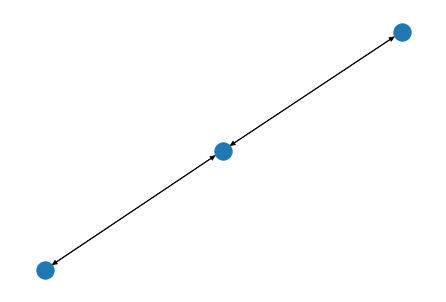

In [17]:
nx.draw(G)

In [18]:
data.keys

['x', 'edge_index']

In [19]:
for key, item in data:
  print(f'{key} found in data')

x found in data
edge_index found in data


In [20]:
'edge_attr' in data

False

In [21]:
data.num_nodes

3

In [22]:
data.num_edges

4

In [23]:
data.num_node_features

1

In [24]:
data.has_isolated_nodes()

False

In [25]:
data.has_self_loops()

False

In [26]:
data.is_directed()

False

# **Another Example:**

In [27]:
edge_index = torch.tensor([[1, 2, 3, 4],
                           [5, 6, 7, 8]], dtype=torch.long)
x = torch.tensor([ [[1], [1], [1]], [[3],[3],[3]] ], dtype=torch.float)
#x = torch.tensor([[1], [1], [1]], dtype=torch.float)

In [28]:
edge_index

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])

In [29]:
edge_index.ndim

2

In [30]:
x

tensor([[[1.],
         [1.],
         [1.]],

        [[3.],
         [3.],
         [3.]]])

In [31]:
x.ndim

3

In [32]:
# create graph data object
data = Data(x=x, edge_index=edge_index)
print(data)

Data(x=[2, 3, 1], edge_index=[2, 4])


In [33]:
# check number of edges of the graph
print(data.num_edges)

4


In [34]:
# check number of nodes of the graph
print(data.num_nodes)

2


In [35]:
# check number of features of the graph
print(data.num_features)

1


In [36]:
# check if graph is directed
print(data.is_directed())

True


In [37]:
G = to_networkx(data)

In [38]:
type(G)

networkx.classes.digraph.DiGraph

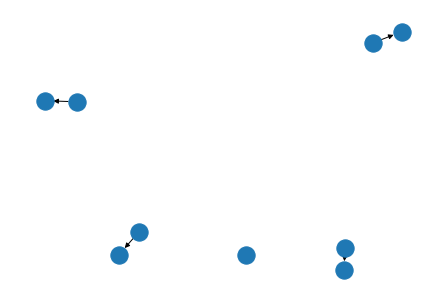

In [39]:
nx.draw(G)

In [40]:
print(nx.is_weighted(G))
print(nx.is_directed(G))
print(G.order())
print(G.number_of_edges())
print(G.number_of_nodes())
print(G.edges)
print(G.nodes)

False
True
9
4
9
[(1, 5), (2, 6), (3, 7), (4, 8)]
[0, 1, 5, 2, 6, 3, 7, 4, 8]


In [42]:
nx.write_graphml(G, 'demo-8.graphml')

In [43]:
for line in nx.generate_graphml(G): 
  print(line)

<graphml xmlns="http://graphml.graphdrawing.org/xmlns" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd">
  <graph edgedefault="directed">
    <node id="0" />
    <node id="1" />
    <node id="5" />
    <node id="2" />
    <node id="6" />
    <node id="3" />
    <node id="7" />
    <node id="4" />
    <node id="8" />
    <edge source="1" target="5" />
    <edge source="2" target="6" />
    <edge source="3" target="7" />
    <edge source="4" target="8" />
  </graph>
</graphml>


In [44]:
!cat '/content/demo-8.graphml'

<?xml version='1.0' encoding='utf-8'?>
<graphml xmlns="http://graphml.graphdrawing.org/xmlns" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd"><graph edgedefault="directed"><node id="0"/>
<node id="1"/>
<node id="5"/>
<node id="2"/>
<node id="6"/>
<node id="3"/>
<node id="7"/>
<node id="4"/>
<node id="8"/>
<edge source="1" target="5"/>
<edge source="2" target="6"/>
<edge source="3" target="7"/>
<edge source="4" target="8"/>
</graph></graphml>